In [ ]:
# What is the relationship between sensation seeking and movie experience?

# 1. Load the data, both sensation seeking and movie experience
# 2. Exploring data frames
# 3. Correlation heatmap 
    # 3a. sensation seeking 
    # 3b. movie experience
# 4. Scaling and centering the data before PCA
    # 4a. sensation seeking 
    # 4b. movie experience
# 5. PCA: getting eigenvalues, loading scores, and rotated data
    # 5a. sensation seeking 
    # 5b. movie experience
# 6. Screeplot and choosing the factors
    # 6a. sensation seeking 
    # 6b. movie experience
# 7. Interpreting the factors by plotting
    # 7a. sensation seeking 
    # 7b. movie experience
# 8. Storing both of the transformed data in terms of their factor values 
# 9. Correlate the two data from #8, respectively

In [2]:
# 0. Init
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA

In [38]:
# 1. Load the data, both sensation seeking and movie experience
df = pd.read_csv('movieReplicationSet.csv', sep=',')

df1 = df.iloc[:, 400:420]
df2 = df.iloc[:,464:474]

data = pd.concat([df1, df2], axis=1).dropna()

sensation_seeking = data.iloc[:,0:20]
movie_experience = data.iloc[:,20:]

movie_experience

,I have cried during a movie,I have trouble following the story of a movie,I have trouble remembering the story of a movie a couple of days after seeing it,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching
0,3.0,4.0,1.0,1.0,6.0,2.0,5.0,5.0,5.0,1.0
1,5.0,3.0,1.0,3.0,1.0,1.0,6.0,5.0,3.0,2.0
2,4.0,3.0,1.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0
3,4.0,1.0,1.0,3.0,1.0,1.0,4.0,5.0,3.0,1.0
4,4.0,3.0,4.0,2.0,3.0,2.0,5.0,6.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...
1092,5.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,4.0,4.0
1093,5.0,4.0,5.0,5.0,3.0,5.0,5.0,5.0,6.0,5.0
1094,4.0,2.0,3.0,6.0,3.0,1.0,6.0,6.0,4.0,2.0
1095,5.0,5.0,3.0,1.0,1.0,1.0,4.0,3.0,3.0,1.0


In [4]:
# 2. Exploring data frames
predictors_1 = sensation_seeking.to_numpy() # sensation seeking
predictors_2 = movie_experience.to_numpy() # movie experience

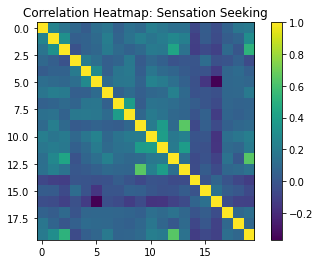

In [5]:
# 3. Correlation heatmap 
# 3a. sensation seeking 
r = np.corrcoef(predictors_1,rowvar=False)
plt.imshow(r) 
plt.colorbar()
plt.title('Correlation Heatmap: Sensation Seeking')
plt.show()

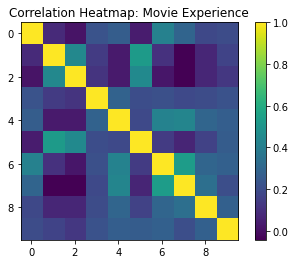

In [6]:
# 3b. movie experience
r = np.corrcoef(predictors_2,rowvar=False)
plt.imshow(r) 
plt.colorbar()
plt.title('Correlation Heatmap: Movie Experience')
plt.show()

In [7]:
# 4. Scaling and centering the data before PCA
zscoredData_1 = stats.zscore(predictors_1) # 4a. sensation seeking 
zscoredData_2 = stats.zscore(predictors_2) # 4b. movie experience

In [8]:
# 5. PCA: getting eigenvalues, loading scores, and rotated data
# 5a. sensation seeking 
pca = PCA().fit(zscoredData_1)
eigVals_1 = pca.explained_variance_ # eigenvalues
loadings_1 = pca.components_*-1 # loadings
pcaData_1 = pca.fit_transform(zscoredData_1)*-1 # rotated data

In [9]:
# 5b. movie experience
pca = PCA().fit(zscoredData_2)
eigVals_2 = pca.explained_variance_ # eigenvalues
loadings_2 = pca.components_*-1 # loadings
pcaData_2 = pca.fit_transform(zscoredData_2)*-1 # rotated data

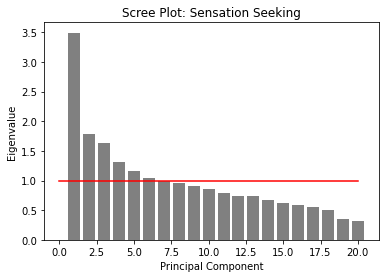

In [10]:
# 6. Screeplot and choosing the factors
# 6a. sensation seeking: 6 factors
numPredictors_1 = 20
x_1 = np.linspace(1, numPredictors_1, numPredictors_1)
plt.bar(x_1, eigVals_1, color='gray')
plt.plot([0, numPredictors_1],[1,1],color='red') 
plt.ylabel('Eigenvalue')
plt.xlabel('Principal Component')
plt.title('Scree Plot: Sensation Seeking')
plt.show()

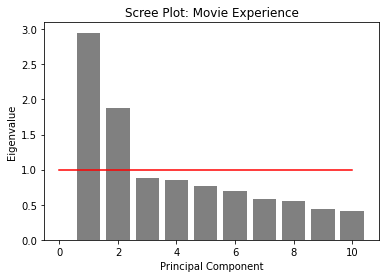

In [11]:
# 6b. movie experience: 2 factors
numPredictors_2 = 10
x_2 = np.linspace(1, numPredictors_2, numPredictors_2)
plt.bar(x_2, eigVals_2, color='gray')
plt.plot([0, numPredictors_2],[1,1],color='red') 
plt.ylabel('Eigenvalue')
plt.xlabel('Principal Component')
plt.title('Scree Plot: Movie Experience')
plt.show()

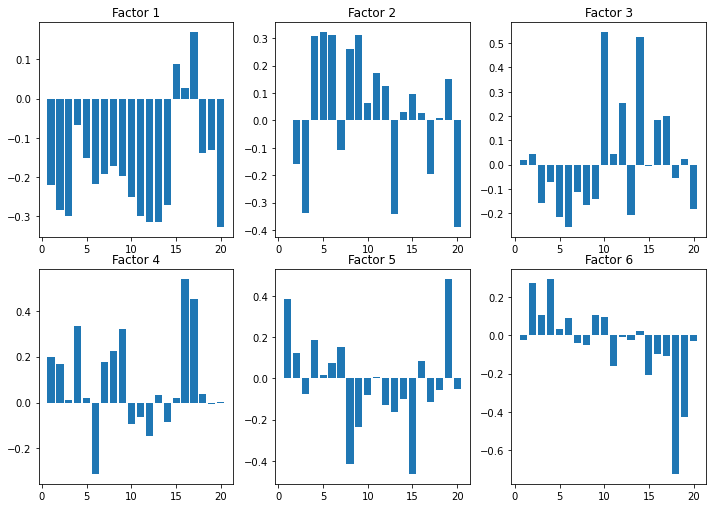

In [12]:
# 7. Interpreting the factors by plotting
# 7a. sensation seeking 
fig,ax = plt.subplots(2,3,figsize=(10,7))
fig.tight_layout()

ax[0, 0].bar(x_1,loadings_1[0,:])
ax[0, 0].set_title('Factor 1')

ax[0, 1].bar(x_1,loadings_1[1,:])
ax[0, 1].set_title('Factor 2')

ax[0, 2].bar(x_1,loadings_1[2,:])
ax[0, 2].set_title('Factor 3')

ax[1, 0].bar(x_1,loadings_1[3,:])
ax[1, 0].set_title('Factor 4')

ax[1, 1].bar(x_1,loadings_1[4,:])
ax[1, 1].set_title('Factor 5')

ax[1, 2].bar(x_1,loadings_1[5,:])
ax[1, 2].set_title('Factor 6')

plt.show()

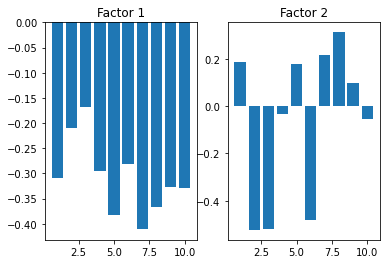

In [13]:
# 7b. movie experience
plt.subplot(1,2,1) # Factor 1: 
plt.bar(x_2,loadings_2[0,:]) 
plt.title('Factor 1')
plt.subplot(1,2,2) # Factor 2:
plt.bar(x_2,loadings_2[1,:]) 
plt.title('Factor 2')
plt.show()

In [20]:
# 8. Storing both of the transformed data in terms of their factor values 
sensation_seeking = np.column_stack((pcaData_1[:,0],pcaData_1[:,1],pcaData_1[:,2],
                                     pcaData_1[:,3],pcaData_1[:,4],pcaData_1[:,5]))

movie_experience = np.column_stack((pcaData_2[:,0],pcaData_2[:,1]))

In [37]:
# 9. Correlate the two data from #8, respectively
np.corrcoef(sensation_seeking[:,1], movie_experience[:,0], rowvar=False)

array([[ 1.        , -0.13182897],
       [-0.13182897,  1.        ]])